In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/02%20Auto%20Imports%20Prices%20Dataset/Automobile%20price%20data%20_Raw_.csv')

In [3]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
data1=data[['normalized-losses','engine-size','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]

In [8]:
data1

,normalized-losses,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,130,9.0,111,5000,21,27,13495
1,?,130,9.0,111,5000,21,27,16500
2,?,152,9.0,154,5000,19,26,16500
3,164,109,10.0,102,5500,24,30,13950
4,164,136,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...
200,95,141,9.5,114,5400,23,28,16845
201,95,141,8.7,160,5300,19,25,19045
202,95,173,8.8,134,5500,18,23,21485
203,95,145,23.0,106,4800,26,27,22470


In [9]:
data1.isna().sum()

normalized-losses    0
engine-size          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
data1.replace('?',np.nan,inplace=True)

In [18]:
data1.isna().sum()

normalized-losses    41
engine-size           0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [17]:
data1

,normalized-losses,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,130,9.0,111,5000,21,27,13495
1,NaN,130,9.0,111,5000,21,27,16500
2,NaN,152,9.0,154,5000,19,26,16500
3,164,109,10.0,102,5500,24,30,13950
4,164,136,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...
200,95,141,9.5,114,5400,23,28,16845
201,95,141,8.7,160,5300,19,25,19045
202,95,173,8.8,134,5500,18,23,21485
203,95,145,23.0,106,4800,26,27,22470


In [23]:
data2=data1.fillna(method='bfill')

In [24]:
data2.isna().sum()

normalized-losses    0
engine-size          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [25]:
data2

,normalized-losses,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,164,130,9.0,111,5000,21,27,13495
1,164,130,9.0,111,5000,21,27,16500
2,164,152,9.0,154,5000,19,26,16500
3,164,109,10.0,102,5500,24,30,13950
4,164,136,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...
200,95,141,9.5,114,5400,23,28,16845
201,95,141,8.7,160,5300,19,25,19045
202,95,173,8.8,134,5500,18,23,21485
203,95,145,23.0,106,4800,26,27,22470


In [26]:
data2.head(2)

,normalized-losses,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,164,130,9.0,111,5000,21,27,13495
1,164,130,9.0,111,5000,21,27,16500


In [27]:
data2.tail(2)

,normalized-losses,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
203,95,145,23.0,106,4800,26,27,22470
204,95,141,9.5,114,5400,19,25,22625


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   engine-size        205 non-null    int64  
 2   compression-ratio  205 non-null    float64
 3   horsepower         205 non-null    object 
 4   peak-rpm           205 non-null    object 
 5   city-mpg           205 non-null    int64  
 6   highway-mpg        205 non-null    int64  
 7   price              205 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.9+ KB


In [29]:
data2.describe()

,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000
mean,126.907317,10.142537,25.219512,30.751220
std,41.642693,3.972040,6.542142,6.886443
min,61.000000,7.000000,13.000000,16.000000
25%,97.000000,8.600000,19.000000,25.000000
50%,120.000000,9.000000,24.000000,30.000000
75%,141.000000,9.400000,30.000000,34.000000
max,326.000000,23.000000,49.000000,54.000000


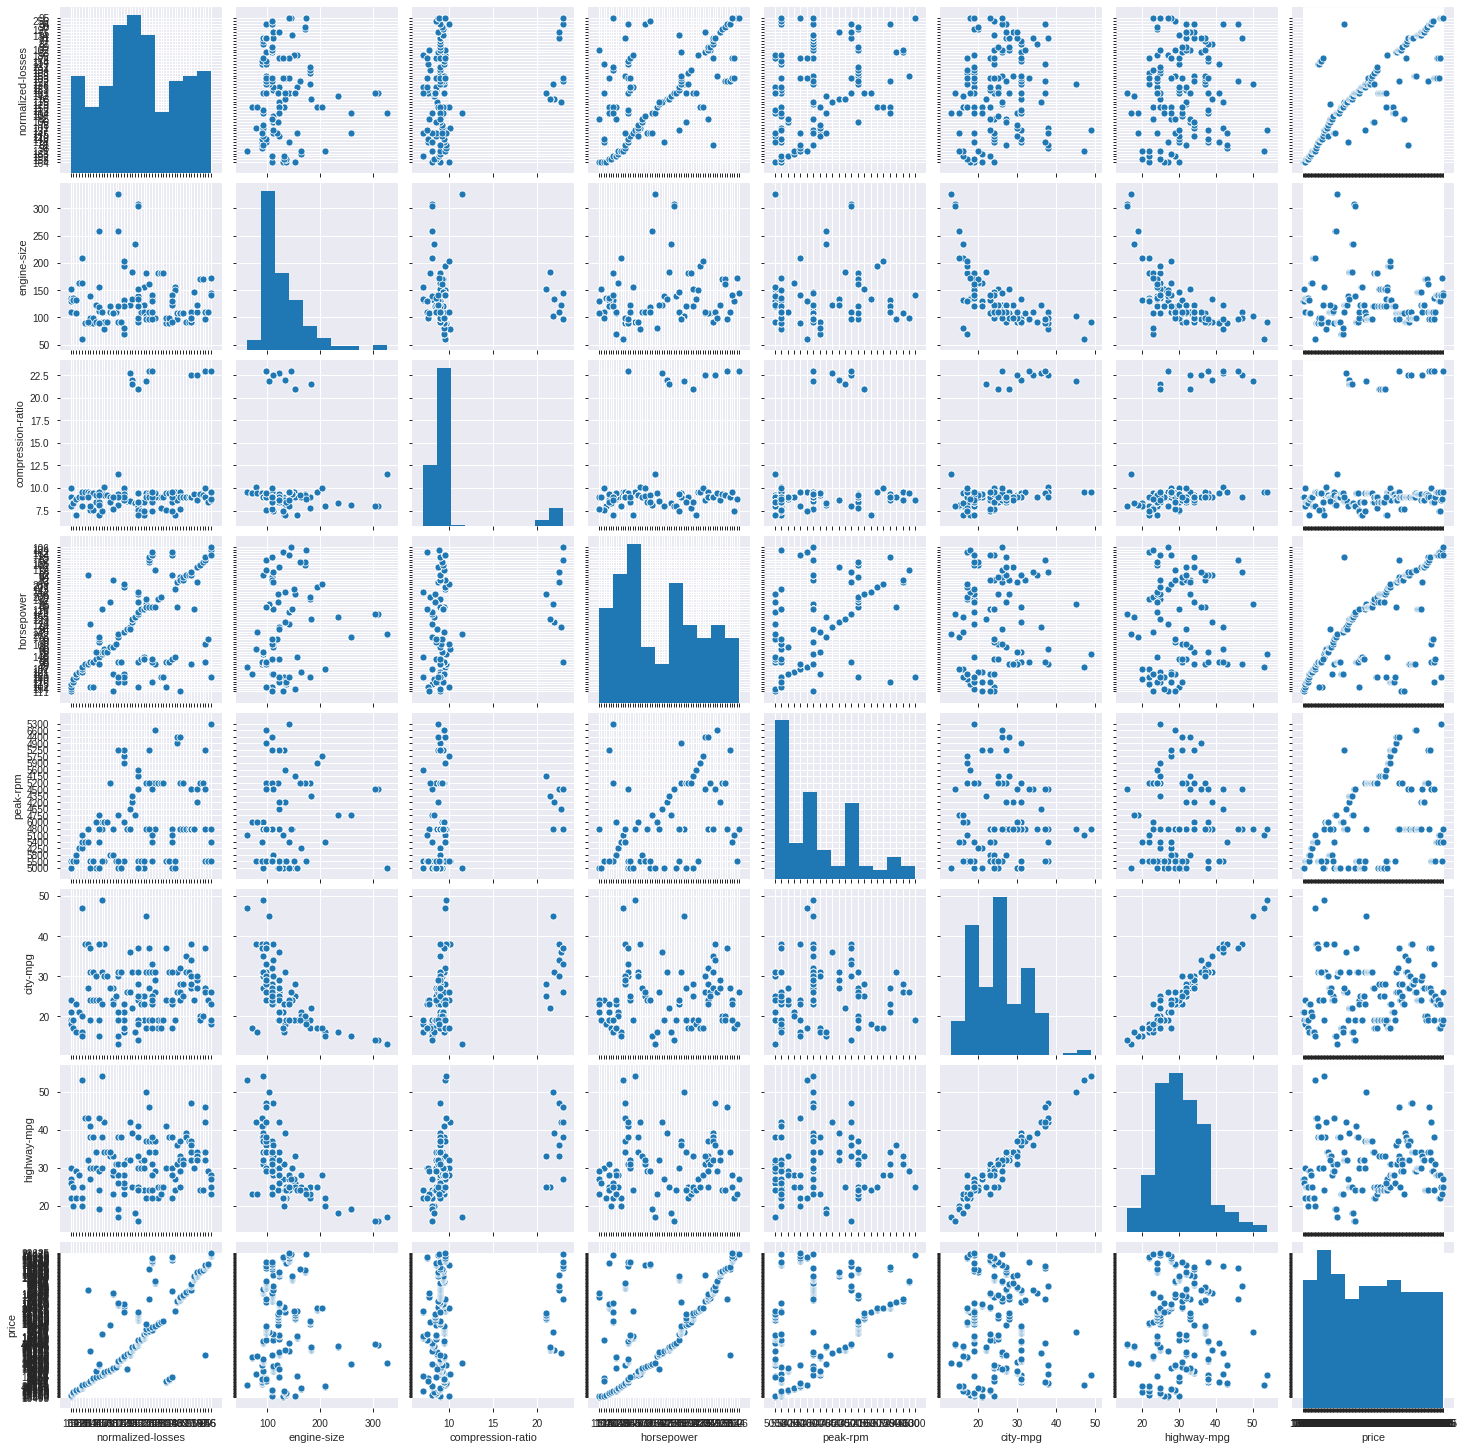

In [30]:
sns.pairplot(data2)

In [31]:
pandas_profiling.ProfileReport(data2)

In [32]:
data2.columns

Index(['normalized-losses', 'engine-size', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [34]:
x_data=data2[['normalized-losses', 'engine-size', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']]

In [37]:
x_data.head(2)

,normalized-losses,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,164,130,9.0,111,5000,21,27
1,164,130,9.0,111,5000,21,27


In [38]:
y_data=data2['price']

In [39]:
y_data.tail(2)

203    22470
204    22625
Name: price, dtype: object

In [96]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.20,random_state=1)

In [97]:
lr=LinearRegression()

In [98]:
lr.fit(X_traine,Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
X_traine.shape

(164, 7)

In [100]:
Y_traine.shape

(164,)

In [101]:
X_test.shape

(41, 7)

In [102]:
Y_test.shape

(41,)

In [103]:
lr.coef_

array([-3.23786784e-01,  1.46896053e+02,  3.51649414e+02, -2.30881569e+01,
        2.34485517e+00, -1.60152961e+02, -1.99661202e+02])

In [104]:
lr.intercept_

-8506.801357853545

In [105]:
train_score=lr.score(X_traine,Y_traine)
train_score

0.7956195827324181

In [106]:
test_score=lr.score(X_test,Y_test)
test_score

0.7396343429640964

In [107]:
rr=Ridge(alpha=0.01)
rr.fit(X_traine,Y_traine)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
rr.coef_

array([-3.23771401e-01,  1.46896064e+02,  3.51647190e+02, -2.30880366e+01,
        2.34484758e+00, -1.60151480e+02, -1.99661414e+02])

In [109]:
rr.intercept_

-8506.786489132866

In [111]:
rr100=Ridge(alpha=100)
rr100.fit(X_traine,Y_traine)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
rr100.coef_

array([-1.90192364e-01,  1.47048747e+02,  3.31032033e+02, -2.20268317e+01,
        2.27332993e+00, -1.49523920e+02, -1.98610844e+02])

In [113]:
rr100.intercept_

-8377.98400601473

In [114]:
Ridge_train_score=rr.score(X_traine,Y_traine)
Ridge_train_score

0.7956195827314754

In [115]:
Ridge_test_score=rr.score(X_test,Y_test)
Ridge_test_score

0.7396344537757463

In [116]:
Ridge_train_score100=rr100.score(X_traine,Y_traine)
Ridge_train_score100

0.7955364423260126

In [117]:
Ridge_test_score100=rr100.score(X_test,Y_test)
Ridge_test_score100

0.7405474603917188

In [119]:
lo=Lasso(alpha=(0.01)**2)
lo.fit(X_traine,Y_traine)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
lo.coef_

array([-3.23786525e-01,  1.46896053e+02,  3.51649401e+02, -2.30881553e+01,
        2.34485512e+00, -1.60152941e+02, -1.99661211e+02])

In [121]:
lo.intercept_

-8506.801319427394

In [122]:
Lasso_train_score=lo.score(X_traine,Y_traine)
Lasso_train_score

0.795619582732418

In [123]:
Lasso_test_score=lo.score(X_test,Y_test)
Lasso_test_score

0.7396343442646574

In [124]:
lo100=Lasso(alpha=(100)**2)
lo100.fit(X_traine,Y_traine)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
lo100.coef_

array([  0.        , 156.08297775,   0.        ,   3.61083012,
         1.23991645,  -0.        ,  -0.        ])

In [126]:
lo100.intercept_

-13403.212522921835

In [127]:
Lasso_train_score100=lo100.score(X_traine,Y_traine)
Lasso_train_score100

0.7512902542798499

In [128]:
Lasso_test_score100=lo100.score(X_test,Y_test)
Lasso_test_score100

0.7231569457534095

In [129]:
print("linear regression trine score",train_score)
print("linear regression test score",test_score)
print("linear regression trine score low_alpha",Ridge_train_score)
print("linear regression test score high_alpha",Ridge_test_score)
print("linear regression trine score low_alpha",Ridge_train_score100)
print("linear regression test score high_alpha",Ridge_test_score100)
print("linear regression trine score low_alpha",Lasso_train_score)
print("linear regression test score high_alpha",Lasso_test_score)
print("linear regression trine score low_alpha",Lasso_train_score100)
print("linear regression test score high_alpha",Lasso_test_score100)

linear regression trine score 0.7956195827324181
linear regression test score 0.7396343429640964
linear regression trine score low_alpha 0.7956195827314754
linear regression test score high_alpha 0.7396344537757463
linear regression trine score low_alpha 0.7955364423260126
linear regression test score high_alpha 0.7405474603917188
linear regression trine score low_alpha 0.795619582732418
linear regression test score high_alpha 0.7396343442646574
linear regression trine score low_alpha 0.7512902542798499
linear regression test score high_alpha 0.7231569457534095


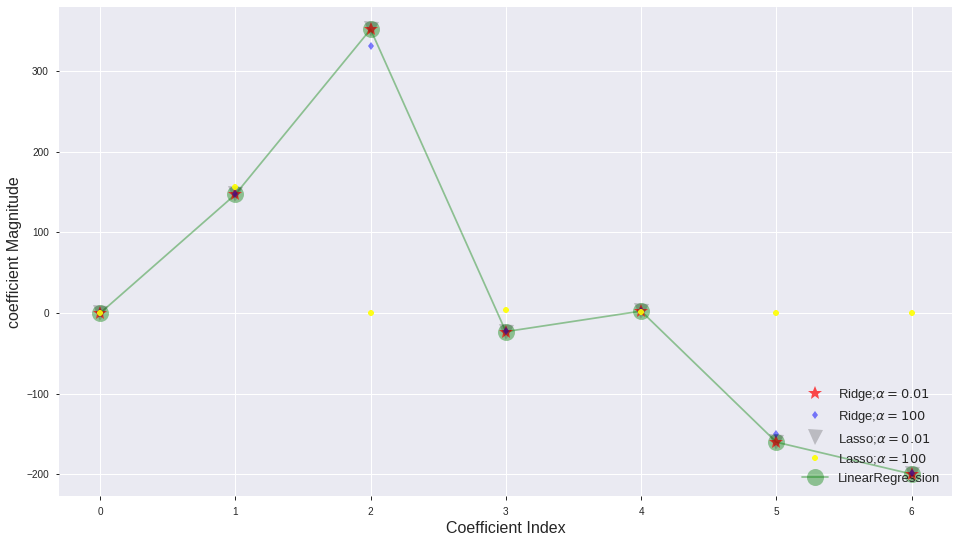

In [131]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge;$\alpha=100$',zorder=7)
plt.plot(lo.coef_,alpha=0.2,linestyle='none',marker='v',markersize=15,color='black',
         label=r'Lasso;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(lo100.coef_,alpha=0.9,linestyle='none',marker='8',markersize=6,color='yellow',
         label=r'Lasso;$\alpha=100$',zorder=7)

#alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='LinearRegression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [132]:
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge,ElasticNet
Lasso_CV=LassoCV()
Ridge_CV=RidgeCV()
rr=Ridge()
Lo=Lasso()
ENET=ElasticNet()

In [133]:
Lasso_CV.fit(X_traine,Y_traine)
Ridge_CV.fit(X_traine,Y_traine)
rr.fit(X_traine,Y_traine)
Lo.fit(X_traine,Y_traine)
ENET.fit(X_traine,Y_traine)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
Predicate=pd.DataFrame({'Lasso_CV_pred':Lasso_CV.predict(X_test),
            'Ridge_CV_pred':Ridge_CV.predict(X_test),
                        'rr':rr.predict(X_test),
                        'Lo':Lo.predict(X_test),'Actual_data':Y_test})
Predicate

,Lasso_CV_pred,Ridge_CV_pred,rr,Lo,Actual_data
78,7013.602085,7037.545960,7036.017689,7035.893192,6669
97,7390.320970,7265.649272,7262.570835,7262.370247,7999
151,5597.043716,5422.313617,5416.883032,5416.477135,6338
44,5144.044781,4428.628975,4418.654957,4418.561647,11048
40,11248.668162,11487.355855,11490.375796,11490.300482,10295
67,23923.651260,24730.473476,24748.854197,24749.751301,25552
98,7403.191992,7245.584340,7241.624493,7241.492732,8249
18,-2165.534656,-3481.928751,-3501.192445,-3501.521963,5151
152,5594.469511,5426.326604,5421.072300,5420.652638,6488
62,11226.308204,11168.394671,11164.646392,11164.305988,10245


In [136]:
#Recursive Feature Elimination:The Syntax
#import the class containing the feature selection method 
from sklearn.feature_selection import RFE

In [137]:
#create an instance of the class
rfeMod=RFE(rr,n_features_to_select=7)

In [139]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod.fit(X_traine,Y_traine)
Y_predict=rfeMod.predict(X_test)

In [140]:
Y_predict

array([ 7036.01768939,  7262.57083472,  5416.88303152,  4418.65495732,
       11490.37579551, 24748.85419663,  7241.62449321, -3501.19244483,
        5421.07229982, 11164.64639186, 17196.92933976, 14910.99161968,
       16118.10041117, 11483.60851594, 17365.86535697, 14910.99161968,
       11595.87089217,  8931.2394614 , 13352.2515386 ,  9091.99238113,
        8745.45456147,  7960.90512692, 12184.42272658,  9231.2708348 ,
       14910.99161968,  8931.2394614 , 17372.31038512,  8742.36747829,
        6744.47922022,  8928.33919873,  7206.29294274, 12227.00440108,
       26473.77505736, 13792.04325959, 17617.24134112,  8733.34443887,
        9221.92554397, 33072.98813648, 10298.05470689, 17510.4063588 ,
        6624.8980963 ])

In [141]:
Y_test

78      6669
97      7999
151     6338
44     11048
40     10295
67     25552
98      8249
18      5151
152     6488
62     10245
4      17450
172    17669
197    16515
38      9095
29     12964
170    11199
190     9980
33      6529
136    18150
145    11259
173     8948
31      6855
11     16925
119     7957
169     9989
34      7129
84     14489
184     7995
120     6229
35      7295
163     8058
28      8921
16     41315
130     9295
116    17950
182     7775
27      8558
47     32250
58     15645
204    22625
138     5118
Name: price, dtype: object

In [142]:
rfeMod1=RFE(lo,n_features_to_select=7)

In [146]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod1.fit(X_traine,Y_traine)
Y_predict1=rfeMod.predict(X_test)

In [147]:
Y_predict1

array([ 7035.85166263,  7262.22806447,  5416.28245472,  4417.53155816,
       11490.71618327, 24750.90797611,  7241.18194035, -3503.35372763,
        5420.49167954, 11164.23080367, 17197.42176474, 14910.54603847,
       16118.23464932, 11483.91666625, 17365.29778041, 14910.54603847,
       11595.92244456,  8931.46907425, 13352.39861823,  9091.32015362,
        8744.18551304,  7961.01497527, 12184.8833184 ,  9231.22108495,
       14910.54603847,  8931.46907425, 17371.77351091,  8744.26205202,
        6744.32606313,  8928.55499552,  7205.67754493, 12226.93150227,
       26473.67039285, 13792.03654147, 17618.57815242,  8735.19602932,
        9221.83127572, 33072.48071218, 10299.39411812, 17511.18347031,
        6624.2487101 ])

In [150]:
Y_test

78      6669
97      7999
151     6338
44     11048
40     10295
67     25552
98      8249
18      5151
152     6488
62     10245
4      17450
172    17669
197    16515
38      9095
29     12964
170    11199
190     9980
33      6529
136    18150
145    11259
173     8948
31      6855
11     16925
119     7957
169     9989
34      7129
84     14489
184     7995
120     6229
35      7295
163     8058
28      8921
16     41315
130     9295
116    17950
182     7775
27      8558
47     32250
58     15645
204    22625
138     5118
Name: price, dtype: object

# 